<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Manipulation-&amp;-Aggregation" data-toc-modified-id="Data-Manipulation-&amp;-Aggregation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Manipulation &amp; Aggregation</a></span><ul class="toc-item"><li><span><a href="#Aggregation" data-toc-modified-id="Aggregation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Aggregation</a></span></li></ul></li><li><span><a href="#Viz" data-toc-modified-id="Viz-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Viz</a></span></li></ul></div>

# Data Manipulation & Aggregation

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1=pd.DataFrame(np.random.randn(10,3),columns=['a','b','c'])
df2=pd.DataFrame(np.random.randn(10,3),columns=['a','b','c'])

In [4]:
df1

a         b         c
0  0.069064 -1.270640  0.465133
1  2.261011  0.379698 -0.655524
2 -0.901915  1.674502 -2.312820
3 -1.309943 -0.454163 -1.187289
4 -0.977125 -0.224093  1.318417
5 -0.393706  0.407516  0.546300
6 -0.487126  0.562557  1.203705
7 -0.387779  1.963816  1.632133
8  0.803245 -1.105017  0.371590
9  1.792381 -0.366364 -0.729798

In [5]:
df1>df2

a      b      c
0   True  False  False
1   True   True  False
2  False   True  False
3  False   True  False
4  False   True  False
5  False  False   True
6   True   True   True
7  False   True   True
8   True  False   True
9   True   True   True

In [6]:
df1.b>0

0    False
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9    False
Name: b, dtype: bool

In [7]:
(df1>df2).sum()

a    5
b    7
c    5
dtype: int64

In [9]:
df1.a-df1.b*df1.c

0    0.660080
1    2.509912
2    2.970906
3   -1.849166
4   -0.681677
5   -0.616332
6   -1.164278
7   -3.592989
8    1.213858
9    1.525009
dtype: float64

In [10]:
df1.eval('a-b*c')

0    0.660080
1    2.509912
2    2.970906
3   -1.849166
4   -0.681677
5   -0.616332
6   -1.164278
7   -3.592989
8    1.213858
9    1.525009
dtype: float64

In [12]:
pd.eval('df1.a-df2.b')

0   -0.693340
1    3.164491
2   -0.855073
3    0.768801
4    1.264098
5   -1.291130
6   -0.680536
7   -1.004873
8    0.951715
9    2.406501
dtype: float64

In [13]:
df1.eval('b>0')

0    False
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9    False
dtype: bool

In [14]:
df1[df1.b>0]

a         b         c
1  2.261011  0.379698 -0.655524
2 -0.901915  1.674502 -2.312820
5 -0.393706  0.407516  0.546300
6 -0.487126  0.562557  1.203705
7 -0.387779  1.963816  1.632133

In [15]:
df1.query('b>0')

a         b         c
1  2.261011  0.379698 -0.655524
2 -0.901915  1.674502 -2.312820
5 -0.393706  0.407516  0.546300
6 -0.487126  0.562557  1.203705
7 -0.387779  1.963816  1.632133

In [16]:
seasons=pd.DataFrame(np.random.random((10,4)),columns=['winter','spring','summer','autumn'])

In [17]:
seasons

winter    spring    summer    autumn
0  0.930684  0.220646  0.640277  0.806911
1  0.533580  0.813286  0.805647  0.111299
2  0.204039  0.113519  0.068099  0.430632
3  0.944715  0.891783  0.533051  0.188212
4  0.617139  0.061656  0.894480  0.263711
5  0.154068  0.186984  0.004807  0.782945
6  0.715846  0.281733  0.944782  0.490176
7  0.022528  0.895533  0.079486  0.822414
8  0.980933  0.516128  0.991004  0.161790
9  0.505396  0.980682  0.003706  0.279692

In [20]:
lookup_list=['summer','autumn','autumn','spring','summer','winter','winter','autumn','spring','spring']

In [21]:
seasons.lookup(seasons.index,lookup_list)

array([0.64027673, 0.11129859, 0.43063166, 0.89178292, 0.89447998,
       0.15406788, 0.71584596, 0.82241423, 0.51612838, 0.98068232])

In [27]:
seasons.lookup([0,9],['winter','spring'])

array([0.93068393, 0.98068232])

In [23]:
seasons[seasons.winter>0.5]

winter    spring    summer    autumn
0  0.930684  0.220646  0.640277  0.806911
1  0.533580  0.813286  0.805647  0.111299
3  0.944715  0.891783  0.533051  0.188212
4  0.617139  0.061656  0.894480  0.263711
6  0.715846  0.281733  0.944782  0.490176
8  0.980933  0.516128  0.991004  0.161790
9  0.505396  0.980682  0.003706  0.279692

In [24]:
seasons.query('winter>0.5')

winter    spring    summer    autumn
0  0.930684  0.220646  0.640277  0.806911
1  0.533580  0.813286  0.805647  0.111299
3  0.944715  0.891783  0.533051  0.188212
4  0.617139  0.061656  0.894480  0.263711
6  0.715846  0.281733  0.944782  0.490176
8  0.980933  0.516128  0.991004  0.161790
9  0.505396  0.980682  0.003706  0.279692

In [25]:
seasons.get(seasons.winter>0.5)

winter    spring    summer    autumn
0  0.930684  0.220646  0.640277  0.806911
1  0.533580  0.813286  0.805647  0.111299
3  0.944715  0.891783  0.533051  0.188212
4  0.617139  0.061656  0.894480  0.263711
6  0.715846  0.281733  0.944782  0.490176
8  0.980933  0.516128  0.991004  0.161790
9  0.505396  0.980682  0.003706  0.279692

In [28]:
seasons.query('winter>0.5 & spring<0.5')

winter    spring    summer    autumn
0  0.930684  0.220646  0.640277  0.806911
4  0.617139  0.061656  0.894480  0.263711
6  0.715846  0.281733  0.944782  0.490176

In [29]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
        'model_year','origin','car_name']
auto = pd.read_csv(url, sep='\\s+', names=cols)
auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [32]:
auto.car_name.nunique()-auto.shape[0]

-93

In [33]:
auto.car_name.isna().sum()

0

In [34]:
auto.index

RangeIndex(start=0, stop=398, step=1)

In [35]:
auto.index=pd.RangeIndex(start=0,stop=398*2,step=2)

In [36]:
auto.index

RangeIndex(start=0, stop=796, step=2)

In [37]:
auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
2  15.0          8         350.0      165.0  3693.0          11.5          70   
4  18.0          8         318.0      150.0  3436.0          11.0          70   
6  16.0          8         304.0      150.0  3433.0          12.0          70   
8  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
4       1         plymouth satellite  
6       1              amc rebel sst  
8       1                ford torino

In [38]:
auto.index=auto.car_name

In [39]:
auto.head()

mpg  cylinders  displacement horsepower  weight  \
car_name                                                                      
chevrolet chevelle malibu  18.0          8         307.0      130.0  3504.0   
buick skylark 320          15.0          8         350.0      165.0  3693.0   
plymouth satellite         18.0          8         318.0      150.0  3436.0   
amc rebel sst              16.0          8         304.0      150.0  3433.0   
ford torino                17.0          8         302.0      140.0  3449.0   

                           acceleration  model_year  origin  \
car_name                                                      
chevrolet chevelle malibu          12.0          70       1   
buick skylark 320                  11.5          70       1   
plymouth satellite                 11.0          70       1   
amc rebel sst                      12.0          70       1   
ford torino                        10.5          70       1   

                                            car_name  
car_name                                              
chevrolet chevelle malibu  chevrolet chevelle malibu  
buick skylark 320                  buick skylark 320  
plymouth satellite                plymouth satellite  
amc rebel sst                          amc rebel sst  
ford torino                              ford torino

In [41]:
auto.reset_index(inplace=True, drop=True)

In [43]:
auto.set_index('car_name',inplace=True)

In [44]:
auto.head()

mpg  cylinders  displacement horsepower  weight  \
car_name                                                                      
chevrolet chevelle malibu  18.0          8         307.0      130.0  3504.0   
buick skylark 320          15.0          8         350.0      165.0  3693.0   
plymouth satellite         18.0          8         318.0      150.0  3436.0   
amc rebel sst              16.0          8         304.0      150.0  3433.0   
ford torino                17.0          8         302.0      140.0  3449.0   

                           acceleration  model_year  origin  
car_name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1

In [45]:
auto.car_name

AttributeError: 'DataFrame' object has no attribute 'car_name'

In [46]:
auto.reset_index(inplace=True)

In [47]:
auto.head()

car_name   mpg  cylinders  displacement horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0      130.0   
1          buick skylark 320  15.0          8         350.0      165.0   
2         plymouth satellite  18.0          8         318.0      150.0   
3              amc rebel sst  16.0          8         304.0      150.0   
4                ford torino  17.0          8         302.0      140.0   

   weight  acceleration  model_year  origin  
0  3504.0          12.0          70       1  
1  3693.0          11.5          70       1  
2  3436.0          11.0          70       1  
3  3433.0          12.0          70       1  
4  3449.0          10.5          70       1

In [48]:
auto.car_name.value_counts()

ford pinto           6
amc matador          5
toyota corolla       5
ford maverick        5
toyota corona        4
                    ..
ford granada ghia    1
chevy s-10           1
dodge diplomat       1
dodge d100           1
saab 99gle           1
Name: car_name, Length: 305, dtype: int64

In [50]:
(auto.car_name+' '+auto.model_year.map(str)).value_counts()

ford pinto 75                  2
plymouth reliant 81            2
buick estate wagon (sw) 79     1
nissan stanza xe 82            1
honda civic 76                 1
                              ..
mercury marquis brougham 73    1
volkswagen type 3 72           1
mazda glc deluxe 78            1
ford f250 70                   1
plymouth custom suburb 73      1
Length: 396, dtype: int64

In [53]:
auto.shape

(398, 9)

In [54]:
auto.drop_duplicates(subset=['car_name','model_year'], inplace=True)

In [55]:
auto.shape

(396, 9)

In [57]:
auto.set_index(['model_year','car_name'], inplace=True)

In [58]:
auto.head()

mpg  cylinders  displacement  \
model_year car_name                                                   
70         chevrolet chevelle malibu  18.0          8         307.0   
           buick skylark 320          15.0          8         350.0   
           plymouth satellite         18.0          8         318.0   
           amc rebel sst              16.0          8         304.0   
           ford torino                17.0          8         302.0   

                                     horsepower  weight  acceleration  origin  
model_year car_name                                                            
70         chevrolet chevelle malibu      130.0  3504.0          12.0       1  
           buick skylark 320              165.0  3693.0          11.5       1  
           plymouth satellite             150.0  3436.0          11.0       1  
           amc rebel sst                  150.0  3433.0          12.0       1  
           ford torino                    140.0  3449.0          10.5       1

In [65]:
auto.loc[70]

mpg  cylinders  displacement horsepower  \
car_name                                                                 
chevrolet chevelle malibu     18.0          8         307.0      130.0   
buick skylark 320             15.0          8         350.0      165.0   
plymouth satellite            18.0          8         318.0      150.0   
amc rebel sst                 16.0          8         304.0      150.0   
ford torino                   17.0          8         302.0      140.0   
ford galaxie 500              15.0          8         429.0      198.0   
chevrolet impala              14.0          8         454.0      220.0   
plymouth fury iii             14.0          8         440.0      215.0   
pontiac catalina              14.0          8         455.0      225.0   
amc ambassador dpl            15.0          8         390.0      190.0   
dodge challenger se           15.0          8         383.0      170.0   
plymouth 'cuda 340            14.0          8         340.0      160.0   
chevrolet monte carlo         15.0          8         400.0      150.0   
buick estate wagon (sw)       14.0          8         455.0      225.0   
toyota corona mark ii         24.0          4         113.0      95.00   
plymouth duster               22.0          6         198.0      95.00   
amc hornet                    18.0          6         199.0      97.00   
ford maverick                 21.0          6         200.0      85.00   
datsun pl510                  27.0          4          97.0      88.00   
volkswagen 1131 deluxe sedan  26.0          4          97.0      46.00   
peugeot 504                   25.0          4         110.0      87.00   
audi 100 ls                   24.0          4         107.0      90.00   
saab 99e                      25.0          4         104.0      95.00   
bmw 2002                      26.0          4         121.0      113.0   
amc gremlin                   21.0          6         199.0      90.00   
ford f250                     10.0          8         360.0      215.0   
chevy c20                     10.0          8         307.0      200.0   
dodge d200                    11.0          8         318.0      210.0   
hi 1200d                       9.0          8         304.0      193.0   

                              weight  acceleration  origin  
car_name                                                    
chevrolet chevelle malibu     3504.0          12.0       1  
buick skylark 320             3693.0          11.5       1  
plymouth satellite            3436.0          11.0       1  
amc rebel sst                 3433.0          12.0       1  
ford torino                   3449.0          10.5       1  
ford galaxie 500              4341.0          10.0       1  
chevrolet impala              4354.0           9.0       1  
plymouth fury iii             4312.0           8.5       1  
pontiac catalina              4425.0          10.0       1  
amc ambassador dpl            3850.0           8.5       1  
dodge challenger se           3563.0          10.0       1  
plymouth 'cuda 340            3609.0           8.0       1  
chevrolet monte carlo         3761.0           9.5       1  
buick estate wagon (sw)       3086.0          10.0       1  
toyota corona mark ii         2372.0          15.0       3  
plymouth duster               2833.0          15.5       1  
amc hornet                    2774.0          15.5       1  
ford maverick                 2587.0          16.0       1  
datsun pl510                  2130.0          14.5       3  
volkswagen 1131 deluxe sedan  1835.0          20.5       2  
peugeot 504                   2672.0          17.5       2  
audi 100 ls                   2430.0          14.5       2  
saab 99e                      2375.0          17.5       2  
bmw 2002                      2234.0          12.5       2  
amc gremlin                   2648.0          15.0       1  
ford f250                     4615.0          14.0       1  
chevy c20                   

In [73]:
auto.query('model_year>72 & car_name=="buick century 350"')

mpg  cylinders  displacement horsepower  \
model_year car_name                                                      
73         buick century 350  13.0          8         350.0      175.0   

                              weight  acceleration  origin  
model_year car_name                                         
73         buick century 350  4100.0          13.0       1

In [82]:
auto.query('model_year>72 & car_name.str.contains("chev")', engine='python')

mpg  cylinders  displacement  \
model_year car_name                                                           
73         chevrolet malibu                   13.0          8         350.0   
           chevrolet caprice classic          13.0          8         400.0   
           chevrolet nova custom              16.0          6         250.0   
           chevrolet impala                   11.0          8         400.0   
           chevrolet vega                     21.0          4         140.0   
           chevrolet monte carlo s            15.0          8         350.0   
74         chevrolet nova                     15.0          6         250.0   
           chevrolet vega                     25.0          4         140.0   
           chevrolet chevelle malibu classic  16.0          6         250.0   
75         chevrolet nova                     18.0          6         250.0   
           chevrolet bel air                  15.0          8         350.0   
           chevroelt chevelle malibu          16.0          6         250.0   
           chevrolet monza 2+2                20.0          8         262.0   
76         chevrolet chevelle malibu classic  17.5          8         305.0   
           chevrolet nova                     22.0          6         250.0   
           chevrolet chevette                 29.0          4          85.0   
           chevrolet woody                    24.5          4          98.0   
           chevy c10                          13.0          8         350.0   
77         chevrolet caprice classic          17.5          8         305.0   
           chevrolet concours                 17.5          6         250.0   
           chevrolet monte carlo landau       15.5          8         350.0   
           chevrolet chevette                 30.5          4          98.0   
78         chevrolet malibu                   20.5          6         200.0   
           chevrolet monte carlo landau       19.2          8         305.0   
           chevrolet chevette                 30.0          4          98.0   
79         chevrolet caprice classic          17.0          8         305.0   
           chevrolet malibu classic (sw)      19.2          8         267.0   
           chevrolet citation                 28.8          6         173.0   
80         chevrolet chevette                 32.1          4          98.0   
           chevrolet citation                 28.0          4         151.0   
81         chevrolet citation                 23.5          6         173.0   
82         chevrolet cavalier                 28.0          4         112.0   
           chevrolet cavalier wagon           27.0          4         112.0   
           chevrolet cavalier 2-door          34.0          4         112.0   
           chevrolet camaro                   27.0          4         151.0   
           chevy s-10                         31.0          4         119.0   

                                             horsepower  weight  acceleration  \
model_year car_name                                                             
73         chevrolet malibu                       145.0  3988.0          13.0   
           chevrolet caprice classic              150.0  4464.0          12.0   
           chevrolet nova custom                  100.0  3278.0          18.0   
           chevrolet impala                       150.0  4997.0          14.0   
           chevrolet vega                         72.00  2401.0          19.5   
           chevrolet monte carlo s                145.0  4082.0          13.0   
74         chevrolet nova                         100.0  3336.0          17.0   
           chevrolet vega                         75.00  2542.0          17.0   
           chevrolet chevelle malibu classic      100.0  3781.0          17.0   
75         chevrolet nova                         105.0  3459.0          16.0   
           chevrolet bel air                      145.0  4440.0         

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('../../May/Week7/ks-projects-201801.csv')

In [3]:
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [4]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df.shape

(378661, 15)

In [6]:
df.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [7]:
df.drop('usd pledged',axis=1,inplace=True)

In [8]:
df.replace('N,0"','Unknown',inplace=True)

In [9]:
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd_pledged_real  \
0  2015-08-11 12:12:28      0.0    failed        0      GB               0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US            2421.0   
2  2013-01-12 00:20:50    220.0    failed        3      US             220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US               1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US            1283.0   

   usd_goal_real  
0        1533.95  
1       30000.00  
2       45000.00  
3        5000.00  
4       19500.00

In [10]:
df['duration']=pd.to_datetime(df.deadline)-pd.to_datetime(df.launched)

In [11]:
df.duration.head()

0   58 days 11:47:32
1   59 days 19:16:03
2   44 days 23:39:10
3   29 days 20:35:49
4   55 days 15:24:57
Name: duration, dtype: timedelta64[ns]

In [12]:
pd.to_datetime(df.launched).dt.date.head()

0    2015-08-11
1    2017-09-02
2    2013-01-12
3    2012-03-17
4    2015-07-04
Name: launched, dtype: object

In [13]:
df.assign(dollar_per_backer=df.usd_pledged_real/df.backers,
         duration1=pd.to_datetime(df.deadline)-pd.to_datetime(df.launched)
         ).head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd_pledged_real  \
0  2015-08-11 12:12:28      0.0    failed        0      GB               0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US            2421.0   
2  2013-01-12 00:20:50    220.0    failed        3      US             220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US               1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US            1283.0   

   usd_goal_real         duration  dollar_per_backer        duration1  
0        1533.95 58 days 11:47:32                NaN 58 days 11:47:32  
1       30000.00 59 days 19:16:03         161.400000 59 days 19:16:03  
2       45000.00 44 days 23:39:10          73.333333 44 days 23:39:10  
3        5000.00 29 days 20:35:49           1.000000 29 days 20:35:49  
4       19500.00 55 days 15:24:57          91.642857 55 days 15:24:57

In [14]:
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd_pledged_real  \
0  2015-08-11 12:12:28      0.0    failed        0      GB               0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US            2421.0   
2  2013-01-12 00:20:50    220.0    failed        3      US             220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US               1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US            1283.0   

   usd_goal_real         duration  
0        1533.95 58 days 11:47:32  
1       30000.00 59 days 19:16:03  
2       45000.00 44 days 23:39:10  
3        5000.00 29 days 20:35:49  
4       19500.00 55 days 15:24:57

## Aggregation

In [14]:
df[['country','goal']].groupby('country')['goal'].agg('mean').head()

country
AT     39828.144054
AU     72381.038780
BE     33442.983793
CA     54593.536256
CH    262862.264126
Name: goal, dtype: float64

In [15]:
df[['country','goal']].groupby('country')['goal'].mean().head()

country
AT     39828.144054
AU     72381.038780
BE     33442.983793
CA     54593.536256
CH    262862.264126
Name: goal, dtype: float64

In [16]:
df[['country','goal']].groupby('country')['goal'].agg(np.mean).head()

country
AT     39828.144054
AU     72381.038780
BE     33442.983793
CA     54593.536256
CH    262862.264126
Name: goal, dtype: float64

In [17]:
df[['country','goal']].groupby('country')['goal'].agg('describe').head()

count           mean           std   min     25%      50%      75%  \
country                                                                         
AT         597.0   39828.144054  1.183352e+05  10.0  4000.0  10000.0  30000.0   
AU        7839.0   72381.038780  1.288064e+06   1.0  2200.0   8000.0  25000.0   
BE         617.0   33442.983793  1.140708e+05   1.0  2000.0   6500.0  20000.0   
CA       14756.0   54593.536256  1.254329e+06   1.0  2500.0   7000.0  20000.0   
CH         761.0  262862.264126  4.065139e+06  20.0  5000.0  15000.0  40000.0   

                 max  
country               
AT         1500000.0  
AU       100000000.0  
BE         1500000.0  
CA       100000000.0  
CH       100000000.0

In [18]:
df[['country','goal']].groupby('country')['goal'].agg(['mean','sum','median','std']).head()

mean          sum   median           std
country                                                   
AT        39828.144054   23777402.0  10000.0  1.183352e+05
AU        72381.038780  567394963.0   8000.0  1.288064e+06
BE        33442.983793   20634321.0   6500.0  1.140708e+05
CA        54593.536256  805582221.0   7000.0  1.254329e+06
CH       262862.264126  200038183.0  15000.0  4.065139e+06

In [19]:
df[['country','usd_pledged_real','usd_goal_real']].groupby('country').agg({'usd_pledged_real':'median','usd_goal_real':'mean'}).head()

usd_pledged_real  usd_goal_real
country                                 
AT                 228.24   44652.387655
AU                 221.73   58108.238300
BE                 226.43   37322.199433
CA                 302.82   44408.442966
CH                 371.87  271281.726675

In [20]:
df[['country','usd_pledged_real','usd_goal_real']].groupby('country').agg({'usd_pledged_real':'median','usd_goal_real':'mean'}).head()

usd_pledged_real  usd_goal_real
country                                 
AT                 228.24   44652.387655
AU                 221.73   58108.238300
BE                 226.43   37322.199433
CA                 302.82   44408.442966
CH                 371.87  271281.726675

In [21]:
(df.usd_pledged_real/df.usd_goal_real*100)

0          0.000000
1          8.070000
2          0.488889
3          0.020000
4          6.579487
            ...    
378656     0.050000
378657    10.333333
378658     0.133333
378659     1.333333
378660    26.200000
Length: 378661, dtype: float64

In [37]:
df[['country','usd_pledged_real','usd_goal_real']].groupby('country').apply(lambda x: (x.usd_pledged_real/x.usd_goal_real).mean()).sort_values()

country
JP         0.371693
NO         0.500845
LU         0.548301
BE         0.562335
Unknown    0.576502
IE         0.579413
AT         0.603777
DK         0.766810
ES         0.824175
IT         0.862422
CH         0.886826
DE         0.902399
NL         0.907052
MX         1.050924
GB         1.066430
SE         1.074965
AU         1.140490
SG         1.219504
NZ         1.522428
HK         1.936963
FR         2.035221
CA         3.168369
US         3.772658
dtype: float64

In [1]:
from scipy.stats import mode

In [15]:
def agg_mode(x):
    return((', '.join([i for i in mode(x).values])).strip(', '))
df[['category','country']].groupby('country').agg(agg_mode)

category
country                
AT       Product Design
AU       Product Design
BE          Video Games
CA       Product Design
CH       Product Design
DE       Product Design
DK       Product Design
ES          Video Games
FR          Video Games
GB       Product Design
HK       Product Design
IE       Product Design
IT       Product Design
JP       Product Design
LU       Product Design
MX          Video Games
NL       Product Design
NO       Product Design
NZ       Product Design
SE       Product Design
SG       Product Design
US       Product Design
Unknown           Music

In [60]:
cars=pd.read_csv('../../Slides/vehicles/vehicles/vehicles.csv')
cars.head()

Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          19.388824        18           17            17   
1   Regular          25.354615        13           13            13   
2   Regular          20.600625        16           17            16   
3   Regular          25.354615        13           13            13   
4   Premium          20.600625        14           21            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100  
3               683.615385            2550  
4               555.437500            2550

In [19]:
cars.pivot_table(index='Vehicle Class', columns='Cylinders', aggfunc='median')

CO2 Emission Grams/Mile              \
Cylinders                                             2.0         3.0    
Vehicle Class                                                            
Compact Cars                                           NaN  240.000000   
Large Cars                                             NaN         NaN   
Midsize Cars                                           NaN         NaN   
Midsize Station Wagons                                 NaN         NaN   
Midsize-Large Station Wagons                           NaN         NaN   
Minicompact Cars                                493.722222  246.861111   
Minivan - 2WD                                          NaN         NaN   
Minivan - 4WD                                          NaN         NaN   
Small Pickup Trucks                                    NaN         NaN   
Small Pickup Trucks 2WD                                NaN         NaN   
Small Pickup Trucks 4WD                                NaN         NaN   
Small Sport Utility Vehicle 2WD                        NaN         NaN   
Small Sport Utility Vehicle 4WD                        NaN         NaN   
Small Station Wagons                                   NaN         NaN   
Special Purpose Vehicle                                NaN         NaN   
Special Purpose Vehicle 2WD                            NaN         NaN   
Special Purpose Vehicle 4WD                            NaN         NaN   
Special Purpose Vehicles                               NaN  317.392857   
Special Purpose Vehicles/2wd                           NaN         NaN   
Special Purpose Vehicles/4wd                           NaN         NaN   
Sport Utility Vehicle - 2WD                            NaN         NaN   
Sport Utility Vehicle - 4WD                            NaN         NaN   
Standard Pickup Trucks                                 NaN         NaN   
Standard Pickup Trucks 2WD                             NaN         NaN   
Standard Pickup Trucks 4WD                             NaN         NaN   
Standard Pickup Trucks/2wd                             NaN         NaN   
Standard Sport Utility Vehicle 2WD                     NaN         NaN   
Standard Sport Utility Vehicle 4WD                     NaN         NaN   
Subcompact Cars                                 493.722222  261.382353   
Two Seaters                                     522.764706  244.000000   
Vans                                                   NaN         NaN   
Vans Passenger                                         NaN         NaN   
Vans, Cargo Type                                       NaN         NaN   
Vans, Passenger Type                                   NaN         NaN   

                                                                        \
Cylinders                                 4.0         5.0         6.0    
Vehicle Class                                                            
Compact Cars                        355.480000  403.954545  444.350000   
Large Cars                          355.480000         NaN  444.350000   
Midsize Cars                        370.291667  467.736842  444.350000   
Midsize Station Wagons              403.954545  444.350000  467.736842   
Midsize-Large Station Wagons        423.190476  467.736842  467.736842   
Minicompact Cars                    360.000000  386.391304  467.736842   
Minivan - 2WD                       444.350000         NaN  467.736842   
Minivan - 4WD                              NaN         NaN  493.722222   
Small Pickup Trucks                 423.190476         NaN  493.722222   
Small Pickup Trucks 2WD             423.190476  480.729532  493.722222   
Small Pickup Trucks 4WD             446.500000  493.722222  522.764706   
Small Sport Utility Vehicle 2WD     356.000000         NaN  424.000000   
Small Sport Utility Vehicle 4WD     374.500000  407.000000  444.000000   
Small Station Wagons                355.480000  403.954545  449.000000   
Special Purpose Vehicle             46

In [24]:
cars.pivot_table(index='Vehicle Class', values=['Combined MPG','CO2 Emission Grams/Mile'], aggfunc=['median','mean'])

median               \
                                   CO2 Emission Grams/Mile Combined MPG   
Vehicle Class                                                             
Compact Cars                                    386.391304         23.0   
Large Cars                                      467.736842         19.0   
Midsize Cars                                    423.190476         21.0   
Midsize Station Wagons                          444.350000         20.0   
Midsize-Large Station Wagons                    444.350000         20.0   
Minicompact Cars                                444.350000         20.0   
Minivan - 2WD                                   467.736842         19.0   
Minivan - 4WD                                   493.722222         18.0   
Small Pickup Trucks                             444.350000         20.0   
Small Pickup Trucks 2WD                         460.000000         19.0   
Small Pickup Trucks 4WD                         493.722222         18.0   
Small Sport Utility Vehicle 2WD                 374.000000         24.0   
Small Sport Utility Vehicle 4WD                 400.500000         22.0   
Small Station Wagons                            370.291667         24.0   
Special Purpose Vehicle                         462.727273         22.0   
Special Purpose Vehicle 2WD                     493.722222         18.0   
Special Purpose Vehicle 4WD                     555.437500         16.5   
Special Purpose Vehicles                        555.437500         16.0   
Special Purpose Vehicles/2wd                    458.456349         19.5   
Special Purpose Vehicles/4wd                    522.764706         17.0   
Sport Utility Vehicle - 2WD                     493.722222         18.0   
Sport Utility Vehicle - 4WD                     522.764706         17.0   
Standard Pickup Trucks                          592.466667         15.0   
Standard Pickup Trucks 2WD                      555.437500         16.0   
Standard Pickup Trucks 4WD                      592.466667         15.0   
Standard Pickup Trucks/2wd                      687.684524         13.0   
Standard Sport Utility Vehicle 2WD              481.000000         18.0   
Standard Sport Utility Vehicle 4WD              499.000000         18.0   
Subcompact Cars                                 403.954545         22.0   
Two Seaters                                     467.736842         19.0   
Vans                                            592.466667         15.0   
Vans Passenger                                  631.674020         14.5   
Vans, Cargo Type                                634.785714         14.0   
Vans, Passenger Type                            634.785714         14.0   

                                                      mean               
                                   CO2 Emission Grams/Mile Combined MPG  
Vehicle Class                                                            
Compact Cars                                    396.758088    23.373385  
Large Cars                                      484.391278    18.936854  
Midsize Cars                                    432.861095    21.670441  
Midsize Station Wagons                          432.128533    21.024038  
Midsize-Large Station Wagons                    452.981561    19.924171  
Minicompact Cars                                443.861984    21.028053  
Minivan - 2WD                                   469.287896    19.117825  
Minivan - 4WD                                   504.595699    17.638298  
Small Pickup Trucks                             450.039261    20.257634  
Small Pickup Trucks 2WD                         454.361734    19.997506  
Small Pickup Trucks 4WD                         497.689565    18.125000  
Small Sport Utility Vehicle 2WD                 378.034759    23.818182  
Small Sport Utility Vehicle 4WD                 403.410931    22.421053  
Small Station Wagons                            383.149627    23.839533  
Special Purpose Ve

In [26]:
cars.pivot_table(index='Vehicle Class', values=['Combined MPG','CO2 Emission Grams/Mile'], aggfunc={'Combined MPG':'median', 'CO2 Emission Grams/Mile':['mean','median']})

CO2 Emission Grams/Mile              \
                                                      mean      median   
Vehicle Class                                                            
Compact Cars                                    396.758088  386.391304   
Large Cars                                      484.391278  467.736842   
Midsize Cars                                    432.861095  423.190476   
Midsize Station Wagons                          432.128533  444.350000   
Midsize-Large Station Wagons                    452.981561  444.350000   
Minicompact Cars                                443.861984  444.350000   
Minivan - 2WD                                   469.287896  467.736842   
Minivan - 4WD                                   504.595699  493.722222   
Small Pickup Trucks                             450.039261  444.350000   
Small Pickup Trucks 2WD                         454.361734  460.000000   
Small Pickup Trucks 4WD                         497.689565  493.722222   
Small Sport Utility Vehicle 2WD                 378.034759  374.000000   
Small Sport Utility Vehicle 4WD                 403.410931  400.500000   
Small Station Wagons                            383.149627  370.291667   
Special Purpose Vehicle                         462.727273  462.727273   
Special Purpose Vehicle 2WD                     523.669366  493.722222   
Special Purpose Vehicle 4WD                     562.121707  555.437500   
Special Purpose Vehicles                        554.603335  555.437500   
Special Purpose Vehicles/2wd                    458.456349  458.456349   
Special Purpose Vehicles/4wd                    522.764706  522.764706   
Sport Utility Vehicle - 2WD                     487.995241  493.722222   
Sport Utility Vehicle - 4WD                     531.005884  522.764706   
Standard Pickup Trucks                          605.415356  592.466667   
Standard Pickup Trucks 2WD                      551.421895  555.437500   
Standard Pickup Trucks 4WD                      589.712622  592.466667   
Standard Pickup Trucks/2wd                      687.684524  687.684524   
Standard Sport Utility Vehicle 2WD              487.407821  481.000000   
Standard Sport Utility Vehicle 4WD              505.193154  499.000000   
Subcompact Cars                                 414.484391  403.954545   
Two Seaters                                     498.090133  467.736842   
Vans                                            607.848459  592.466667   
Vans Passenger                                  631.674020  631.674020   
Vans, Cargo Type                                624.214456  634.785714   
Vans, Passenger Type                            648.264752  634.785714   

                                   Combined MPG  
                                         median  
Vehicle Class                                    
Compact Cars                               23.0  
Large Cars                                 19.0  
Midsize Cars                               21.0  
Midsize Station Wagons                     20.0  
Midsize-Large Station Wagons               20.0  
Minicompact Cars                           20.0  
Minivan - 2WD                              19.0  
Minivan - 4WD                              18.0  
Small Pickup Trucks                        20.0  
Small Pickup Trucks 2WD                    19.0  
Small Pickup Trucks 4WD                    18.0  
Small Sport Utility Vehicle 2WD            24.0  
Small Sport Utility Vehicle 4WD            22.0  
Small Station Wagons                       24.0  
Special Purpose Vehicle                    22.0  
Special Purpose Vehicle 2WD                18.0  
Special Purpose Vehicle 4WD                16.5  
Special Purpose Vehicles                   16.0  
Special Purpose Vehicles/2wd               19.5  
Special Purpose Vehicles/4wd               17.0  
Sport Utility Vehicle - 2WD                18.0  
Sport Utility Vehicle - 4WD                17.0  
Standard Pickup Trucks                     15.

In [30]:
cars.pivot_table(index='Vehicle Class',columns='Cylinders',values='Combined MPG', fill_value=0, margins=True).round(2)

Cylinders                             2.0    3.0    4.0    5.0    6.0    8.0  \
Vehicle Class                                                                  
Compact Cars                         0.00  36.33  25.38  21.94  20.05  16.54   
Large Cars                           0.00   0.00  24.28   0.00  20.38  17.32   
Midsize Cars                         0.00   0.00  25.83  19.71  20.34  16.84   
Midsize Station Wagons               0.00   0.00  23.52  20.23  19.58  16.59   
Midsize-Large Station Wagons         0.00   0.00  20.77  19.03  19.40  17.77   
Minicompact Cars                    18.00  38.42  25.08  22.56  19.46  16.82   
Minivan - 2WD                        0.00   0.00  21.52   0.00  18.85   0.00   
Minivan - 4WD                        0.00   0.00   0.00   0.00  17.64   0.00   
Small Pickup Trucks                  0.00   0.00  21.40   0.00  17.87   0.00   
Small Pickup Trucks 2WD              0.00   0.00  21.49  18.06  17.87  16.50   
Small Pickup Trucks 4WD              0.00   0.00  19.69  18.00  17.00  16.00   
Small Sport Utility Vehicle 2WD      0.00   0.00  25.06   0.00  21.29   0.00   
Small Sport Utility Vehicle 4WD      0.00   0.00  24.19  22.00  20.12  16.00   
Small Station Wagons                 0.00   0.00  25.03  22.09  19.54  15.92   
Special Purpose Vehicle              0.00   0.00  22.00   0.00   0.00   0.00   
Special Purpose Vehicle 2WD          0.00   0.00  20.34   0.00  16.72  14.02   
Special Purpose Vehicle 4WD          0.00   0.00  20.11   0.00  16.25  13.52   
Special Purpose Vehicles             0.00  28.00  20.01   0.00  16.05  13.13   
Special Purpose Vehicles/2wd         0.00   0.00  21.00   0.00  18.00   0.00   
Special Purpose Vehicles/4wd         0.00   0.00   0.00   0.00  17.00   0.00   
Sport Utility Vehicle - 2WD          0.00   0.00  22.55  18.20  18.17  15.29   
Sport Utility Vehicle - 4WD          0.00   0.00  21.35  17.05  17.50  14.44   
Standard Pickup Trucks               0.00   0.00  19.17   0.00  15.93  13.82   
Standard Pickup Trucks 2WD           0.00   0.00  20.47  18.07  16.95  15.26   
Standard Pickup Trucks 4WD           0.00   0.00  18.09  17.30  15.89  14.61   
Standard Pickup Trucks/2wd           0.00   0.00   0.00   0.00   0.00  13.00   
Standard Sport Utility Vehicle 2WD   0.00   0.00  24.15   0.00  19.54  16.94   
Standard Sport Utility Vehicle 4WD   0.00   0.00  23.89   0.00  19.93  15.87   
Subcompact Cars                     21.63  35.34  24.91  20.83  19.97  16.59   
Two Seaters                         17.43  39.85  24.94   0.00  19.77  16.02   
Vans                                 0.00   0.00  18.63  15.83  15.67  13.45   
Vans Passenger                       0.00   0.00   0.00   0.00  17.00  12.00   
Vans, Cargo Type                     0.00   0.00  21.67   0.00  15.15  13.94   
Vans, Passenger Type                 0.00   0.00  18.00  15.00  14.81  13.49   
All                                 19.10  36.57  24.08  20.33  18.61  15.21   

Cylinders                            10.0   12.0  16.0    All  
Vehicle Class                                                  
Compact Cars                         0.00  13.76     0  23.37  
Large Cars                           0.00  13.88     0  18.94  
Midsize Cars                        14.24  13.05     0  21.67  
Midsize Station Wagons               0.00   0.00     0  21.02  
Midsize-Large Station Wagons         0.00   0.00     0  19.92  
Minicompact Cars                     0.00  13.18     0  21.03  
Minivan - 2WD                        0.00   0.00     0  19.12  
Minivan - 4WD                        0.00   0.00     0  17.64  
Small Pickup Trucks                  0.00   0.00     0  20.26  
Small Pickup Trucks 2WD              0.00   0.00     0  20.00  
Small Pickup Trucks 4WD              0.00   0.00     0  18.12  
Small Sport Utility Vehicle 2WD      0.00   0.00     0  23.82  
Small Sport Utility Vehicle 4WD      0.00   0.00     0  22.42  
Small Station Wagons                 0.00   0.00     0  23.84  
Special Purpose

# Viz

In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [33]:
%matplotlib inline

In [34]:
x1=np.arange(0,10,1)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
x2=np.linspace(0,5,10)
x2

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

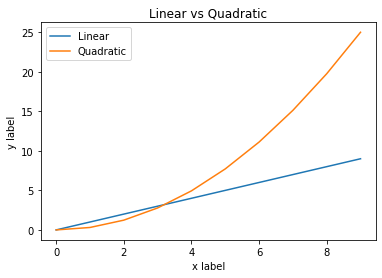

In [45]:
plt.plot(x1,x1,label='Linear')
plt.plot(x1,x2**2,label='Quadratic')
plt.legend()
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Linear vs Quadratic')
plt.show()

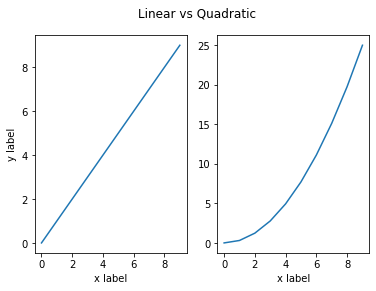

In [49]:
fig,[ax1,ax2]=plt.subplots(1,2)
ax1.plot(x1,x1)
ax1.set_xlabel('x label')
ax1.set_ylabel('y label')

ax2.plot(x1,x2**2)
ax2.set_xlabel('x label')

fig.suptitle('Linear vs Quadratic')
plt.show()

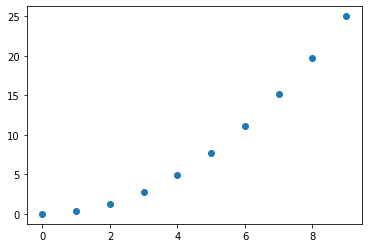

In [50]:
plt.scatter(x1,x2**2)

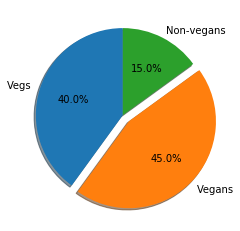

In [51]:
labels=['Vegs','Vegans','Non-vegans']
sizes=[40,45,15]

explode=(0,0.1,0)
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [52]:
sns.set()

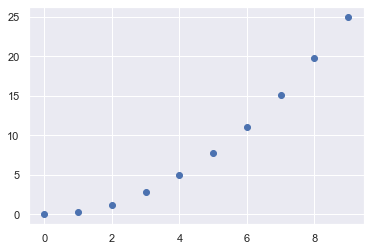

In [53]:
plt.scatter(x1,x2**2)

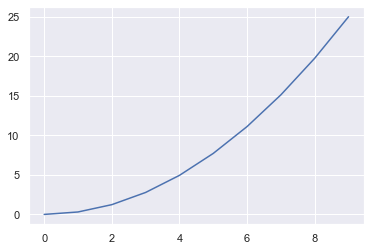

In [54]:
sns.lineplot(x1,x2**2)

In [55]:
df=pd.DataFrame([x1,x2**2], index=['X','Y']).T

In [59]:
df

X          Y
0  0.0   0.000000
1  1.0   0.308642
2  2.0   1.234568
3  3.0   2.777778
4  4.0   4.938272
5  5.0   7.716049
6  6.0  11.111111
7  7.0  15.123457
8  8.0  19.753086
9  9.0  25.000000

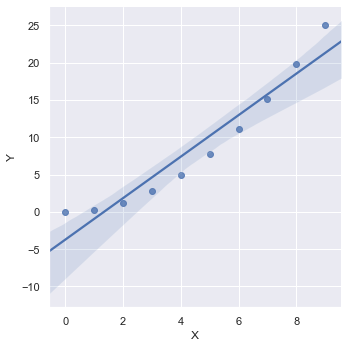

In [58]:
sns.lmplot('X','Y',data=df, fit_reg=True)

In [61]:
cars.sample(5)

Make         Model  Year  Engine Displacement  Cylinders  \
21272       Lexus      IS 250 C  2015                  2.5        6.0   
11247     Ferrari    458 Spider  2014                  4.5        8.0   
853          Audi  A5 Cabriolet  2011                  2.0        4.0   
35376       Volvo           960  1996                  2.9        6.0   
34878  Volkswagen        Passat  2002                  2.8        6.0   

                           Transmission         Drivetrain    Vehicle Class  \
21272                    Automatic (S6)   Rear-Wheel Drive  Subcompact Cars   
11247                         Auto(AM7)   Rear-Wheel Drive      Two Seaters   
853    Automatic (variable gear ratios)  Front-Wheel Drive  Subcompact Cars   
35376                   Automatic 4-spd   Rear-Wheel Drive     Compact Cars   
34878                    Automatic (S5)  Front-Wheel Drive     Midsize Cars   

      Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
21272   Premium          13.733750        21           30            24   
11247   Premium          23.543571        13           17            14   
853     Premium          13.184400        22           30            25   
35376   Premium          17.347895        16           24            19   
34878   Premium          16.480500        17           25            20   

       CO2 Emission Grams/Mile  Fuel Cost/Year  
21272               359.000000            1700  
11247               622.000000            2900  
853                 355.480000            1600  
35376               467.736842            2150  
34878               444.350000            2000

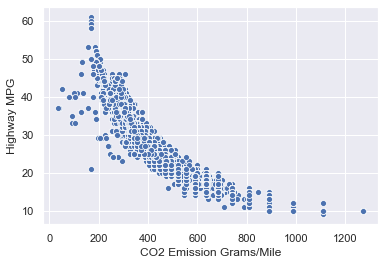

In [64]:
sns.scatterplot(x='CO2 Emission Grams/Mile',y='Highway MPG', data=cars)

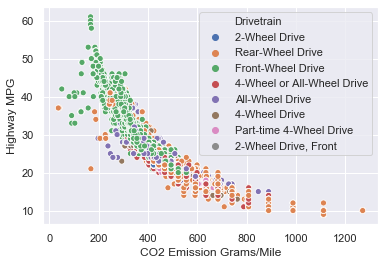

In [65]:
sns.scatterplot(x='CO2 Emission Grams/Mile',y='Highway MPG', data=cars, hue='Drivetrain')

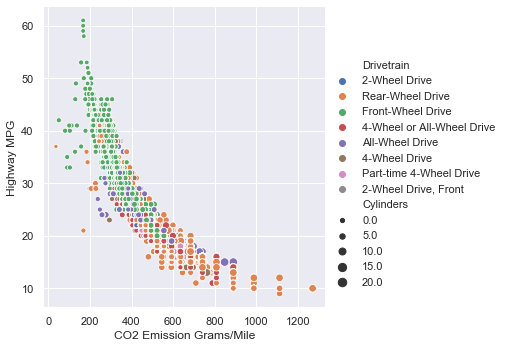

In [66]:
sns.relplot(x='CO2 Emission Grams/Mile',y='Highway MPG', data=cars, hue='Drivetrain', size='Cylinders')

In [67]:
import pandas as pd

In [70]:
pok=pd.read_csv(r'C:\Users\eldiy\Documents\GitHub\data-labs-oct\module-2\lab-two-sample-hypothesis-tests\pokemon.csv')

In [71]:
pok.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [72]:
pok['Type 2']=pok['Type 2'].fillna('')

In [73]:
pok.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire            309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [82]:
set_of_values=set(pok['Type 1'].unique()).union(set(pok['Type 2'].unique()))
set_of_values.remove('')
set_of_values

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [91]:
import re
pok.Name=pok.Name.apply(lambda x: ' '.join(re.findall(r'Mega \w+',x)) if 'Mega' in x else x)

In [87]:
pok.Name.str.split('Mega ')

0                [Bulbasaur]
1                  [Ivysaur]
2                 [Venusaur]
3       [Venusaur, Venusaur]
4               [Charmander]
               ...          
795                [Diancie]
796       [Diancie, Diancie]
797    [HoopaHoopa Confined]
798     [HoopaHoopa Unbound]
799              [Volcanion]
Name: Name, Length: 800, dtype: object

In [92]:
pok['A/D Ratio']=pok.eval('Attack/Defense')

In [93]:
pok.head()

#           Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0  1      Bulbasaur  Grass  Poison    318  45      49       49       65   
1  2        Ivysaur  Grass  Poison    405  60      62       63       80   
2  3       Venusaur  Grass  Poison    525  80      82       83      100   
3  3  Mega Venusaur  Grass  Poison    625  80     100      123      122   
4  4     Charmander   Fire            309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  A/D Ratio  
0       65     45           1      False   1.000000  
1       80     60           1      False   0.984127  
2      100     80           1      False   0.987952  
3      120     80           1      False   0.813008  
4       50     65           1      False   1.209302

In [95]:
pok.loc[pok['A/D Ratio'].idxmin()]

#                   213
Name            Shuckle
Type 1              Bug
Type 2             Rock
Total               505
HP                   20
Attack               10
Defense             230
Sp. Atk              10
Sp. Def             230
Speed                 5
Generation            2
Legendary         False
A/D Ratio     0.0434783
Name: 230, dtype: object

In [98]:
pok.loc[pok['A/D Ratio'].idxmax()]

#                            386
Name          DeoxysAttack Forme
Type 1                   Psychic
Type 2                          
Total                        600
HP                            50
Attack                       180
Defense                       20
Sp. Atk                      180
Sp. Def                       20
Speed                        150
Generation                     3
Legendary                   True
A/D Ratio                      9
Name: 429, dtype: object

In [122]:
pok['Combo Type']=pok.apply(lambda x: (x['Type 1'],x['Type 2']) if (x['Type 2']!='') &(x['Type 1']<x['Type 2']) else ((x['Type 2'],x['Type 1']) ),  axis=1)

In [120]:
'qwer'<'qwg'

True

In [126]:
pok['Combo Type']=pok['Combo Type'].apply(lambda x: '-'.join(x).strip('-'))

In [127]:
pok.head()

#           Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0  1      Bulbasaur  Grass  Poison    318  45      49       49       65   
1  2        Ivysaur  Grass  Poison    405  60      62       63       80   
2  3       Venusaur  Grass  Poison    525  80      82       83      100   
3  3  Mega Venusaur  Grass  Poison    625  80     100      123      122   
4  4     Charmander   Fire            309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  A/D Ratio    Combo Type  
0       65     45           1      False   1.000000  Grass-Poison  
1       80     60           1      False   0.984127  Grass-Poison  
2      100     80           1      False   0.987952  Grass-Poison  
3      120     80           1      False   0.813008  Grass-Poison  
4       50     65           1      False   1.209302          Fire